In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [183]:
dashboard = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/dashboard.csv').sort_values(by='Unnamed: 0')
specs = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/specs.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
bbe = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/bbe.csv').sort_values(by='Unnamed: 0').iloc[: , 4:]
xstats = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/xstats.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
discipline = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/discipline.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
ooz = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/ooz.csv').sort_values(by='Unnamed: 0')
iz = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/iz.csv').sort_values(by='Unnamed: 0')

In [184]:
a = ooz.reindex(columns=['Unnamed: 0','Swing']).rename(columns={"Swing":'O-Swing'})
b = iz.reindex(columns=['Unnamed: 0','Swing','Contact']).rename(columns={"Swing":'Z-Swing','Contact':'Z-Contact'})
c = a.merge(b,on='Unnamed: 0',how='left')

In [185]:
z = pd.concat([dashboard,specs,bbe,xstats,discipline], axis=1) # .rename(columns={"Unnamed: 0": "Pitcher"})

In [186]:
bigboi = z.merge(c,on='Unnamed: 0',how='left').replace('%','', regex=True).replace(',','', regex=True).replace('°','', regex=True).drop(columns=['Unnamed: 1','Unnamed: 2','Unnamed: 3','Starts'])

In [187]:
bigboi = bigboi.rename(columns={"Unnamed: 0":'Pitcher'})
bigboi[['Pitcher','PitchType']] = bigboi['Pitcher'].str.split('\'s',expand=True)

In [188]:
bigboi['Pitches'] = bigboi['Pitches'].astype(float) 
bigboi = bigboi.query('Pitches > 50')

In [189]:
bigboi.to_csv('/Users/joerendon/Desktop/pitchseparationarticle/bigboi.csv')

In [190]:
# list of every pitcher
pitcherlist = list(bigboi['Pitcher'].unique())
# empty df
new_df = pd.DataFrame({
                    'Pitcher':[], 
                    'Primary Pitches':[], 
                    'Secondary Pitches':[],
                    'Primary':[], 
                    'Secondary':[],
                    'H-Mov Diff':[],
                    'V-Mov Diff':[], 
                    'MPH Diff':[], 
                    'RPM Diff':[],
                    'VAA Diff':[],
                    'HAA Diff':[],
                    'Spin Degree Diff':[],
                    'Usage Rate':[],
                    'Chase Rate':[],
                    'Zone Whiff Rate':[],
                    'Called Strike Rate':[],
                    'wOBAcon':[]
                    } )

In [191]:
for i in range(len(pitcherlist)):

    pitcher_name = pitcherlist[i]
    # get pitcher
    ask = bigboi.query(f'Pitcher == "{pitcher_name}"').sort_values(by='Pitches',ascending=False)

    # get primary pitch
    primary = ask.head(1)
    primarytype = primary['PitchType'].values

    # loop through secondaries and get movement difference
    secondaries = ask.query(f'PitchType != {primarytype}')

    for secondaryitem in range(len(secondaries)):

        new_df.loc[len(new_df.index)] = [
                pitcher_name, # Pitcher
                primary['Pitches'],
                secondaries.iloc[secondaryitem]['Pitches'],
                primary['PitchType'].values[0], # Primary
                secondaries.iloc[secondaryitem]['PitchType'], # Secondary
                math.dist([primary[' H-Mov']],[secondaries.iloc[secondaryitem][' H-Mov']]), # H-Mov diff
                math.dist([primary[' V-Mov']],[secondaries.iloc[secondaryitem][' V-Mov']]),# V-Mov diff
                #abs((primary[' V-Mov'] - secondaries.iloc[secondaryitem][' V-Mov']).values[0]), #V-Mov diff
                abs((primary['MPH'] - secondaries.iloc[secondaryitem]['MPH']).values[0]), # Velo diff
                abs((primary['RPM'].astype(float) - float(secondaries.iloc[secondaryitem]['RPM'])).values[0]), # Spin diff
                abs((primary['VAA'].astype(float) - float(secondaries.iloc[secondaryitem]['VAA'])).values[0]), # VertAprrAngle diff
                abs((primary['HAA'].astype(float) - float(secondaries.iloc[secondaryitem]['HAA'])).values[0]), # HorzAprrAngle diff
                abs((primary['Spin Diff'].astype(float) - float(secondaries.iloc[secondaryitem]['Spin Diff'])).values[0]), # Spin angle diff
                float(secondaries.iloc[secondaryitem]['Usage%']), # Usage Rate
                float(secondaries.iloc[secondaryitem]['O-Swing']), # Chase rate
                100 - float(secondaries.iloc[secondaryitem]['Z-Contact']), # Zone Whiff rate
                float(secondaries.iloc[secondaryitem]['CallStr']), #Called Str rate
                float(secondaries.iloc[secondaryitem]['wOBAcon']) # wobacon
        ]
    print(pitcherlist[i])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


Abbott Cory
Abreu Albert
Abreu Bryan
Acevedo Domingo
Adam Jason
Adon Joan
Akin Keegan
Alcantara Sandy
Alexander Jason
Alexander Tyler
Allard Kolby
Allen Logan
Almonte Yency
Alvarado José
Anderson Ian
Anderson Tyler
Appel Mark
Arano Víctor
Archer Chris
Armstrong Shawn
Ashby Aaron
Ashcraft Graham
Baker Bryan
Banda Anthony
Banks Tanner
Bard Daniel
Bard Luke
Barlow Joe
Barlow Scott
Barnes Jacob
Barnes Matt
Barraclough Kyle
Barría Jaime
Bass Anthony
Bassitt Chris
Baumann Mike
Bautista Félix
Baz Shane
Bañuelos Manny
Beasley Jeremy
Bednar David
Beede Tyler
Beeks Jalen
Bellatti Andrew
Bello Brayan
Bender Anthony
Berríos José
Bickford Phil
Bieber Shane
Bielak Brandon
Bird Jake
Blach Ty
Blackburn Paul
Blanco Ronel
Bleier Richard
Bolaños Ronald
Borucki Ryan
Boxberger Brad
Bradish Kyle
Bradley Archie
Brash Matt
Brasier Ryan
Brebbia John
Brentz Jake
Brieske Beau
Brigham Jeff
Brogdon Connor
Brubaker JT
Bruihl Justin
Bubic Kris
Buehler Walker
Bumgarner Madison
Bummer Aaron
Bundy Dylan
Burke Brock
Bur

In [194]:
new_df.to_csv('/Users/joerendon/Desktop/pitchseparationarticle/diffboi.csv')

In [195]:
unique_prim = list(new_df['Primary'].unique())
unique_second = list(new_df['Secondary'].unique())

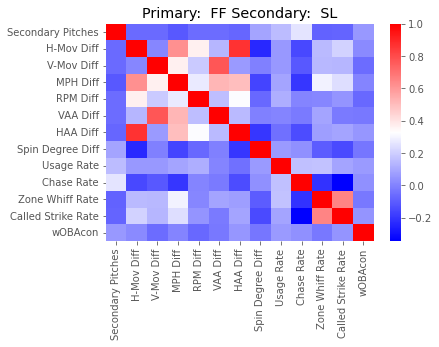

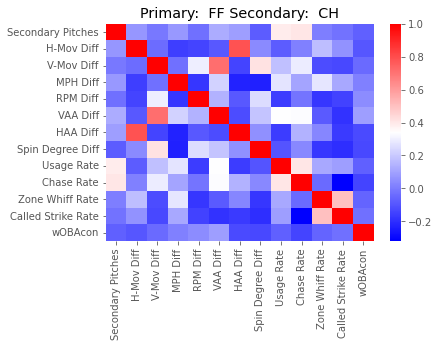

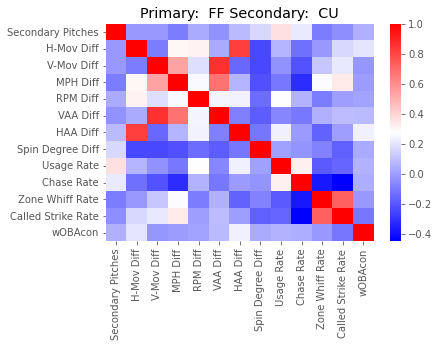

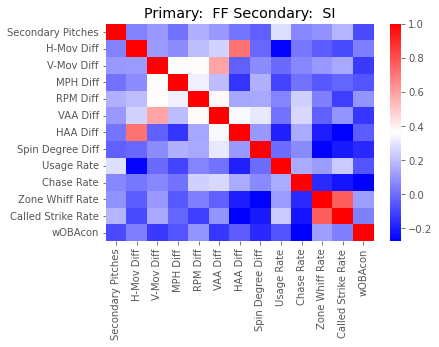

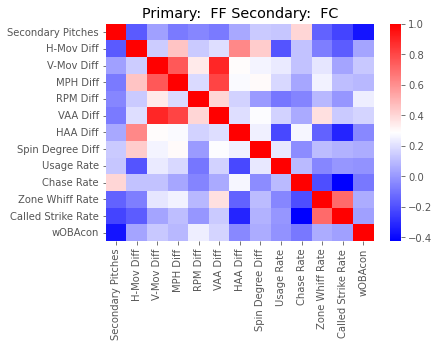

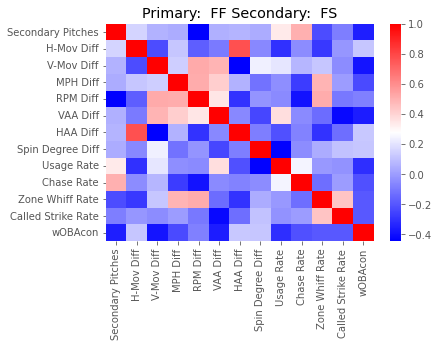

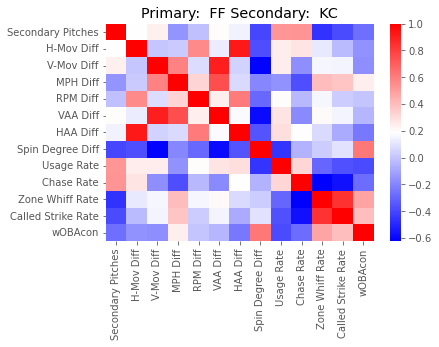

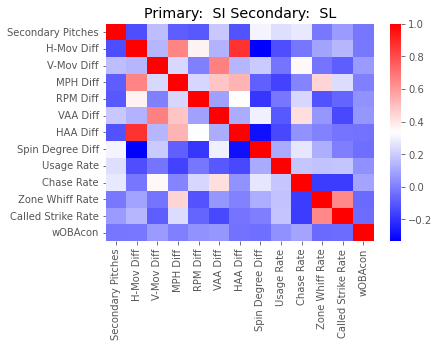

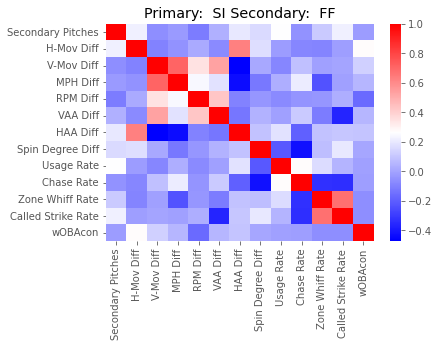

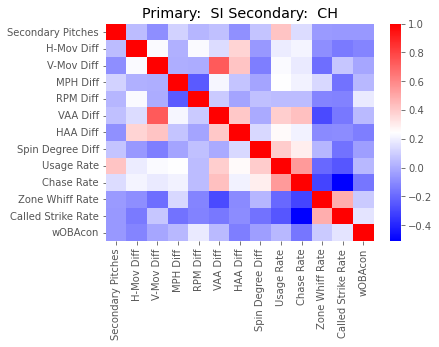

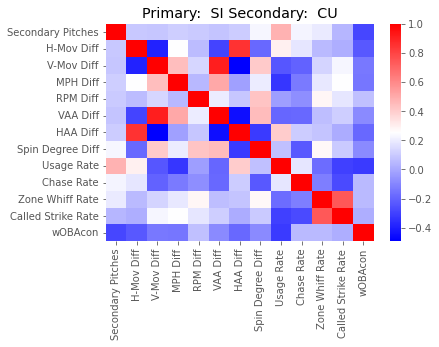

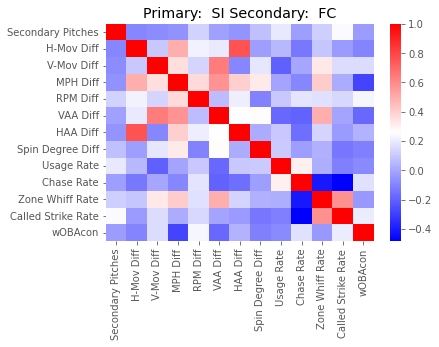

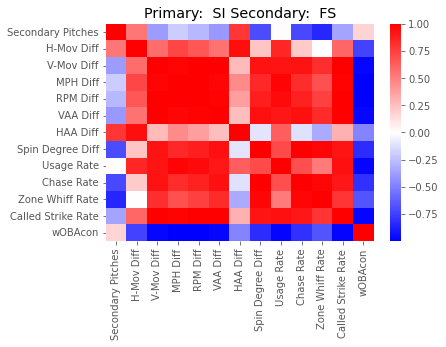

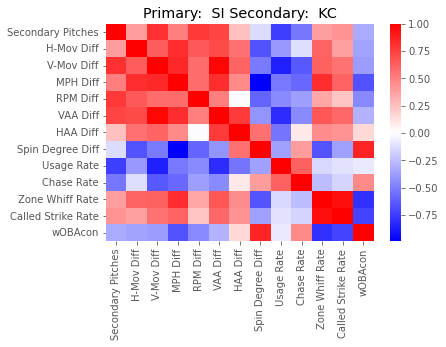

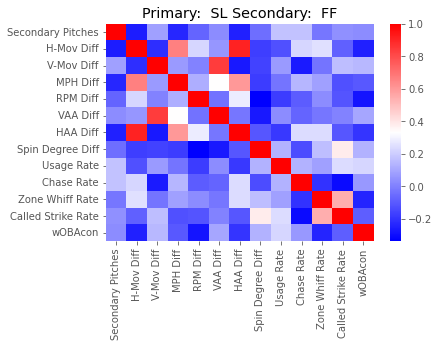

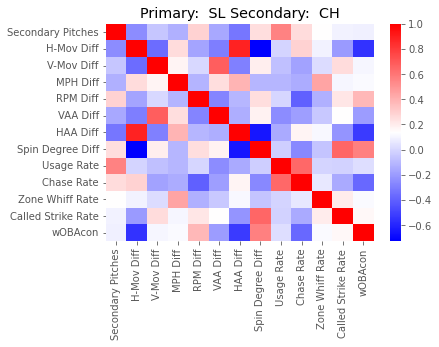

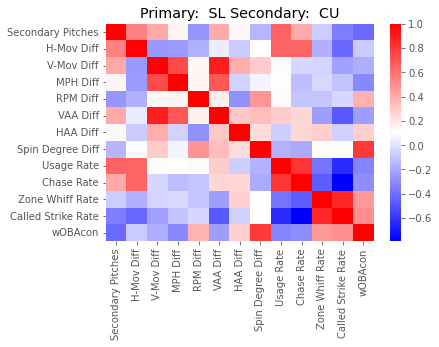

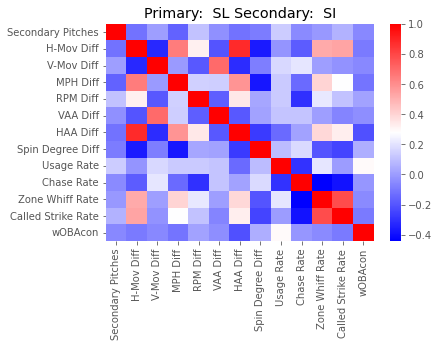

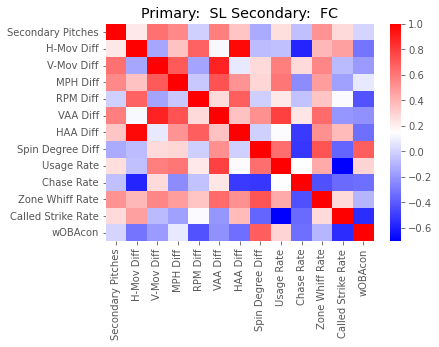

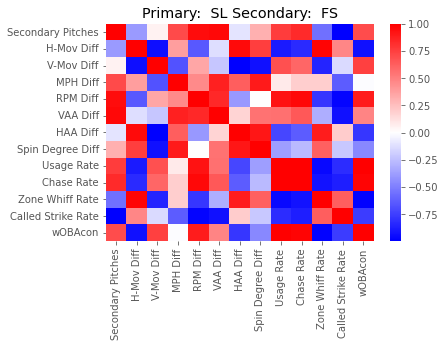

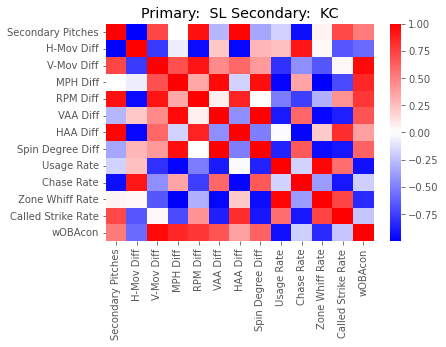

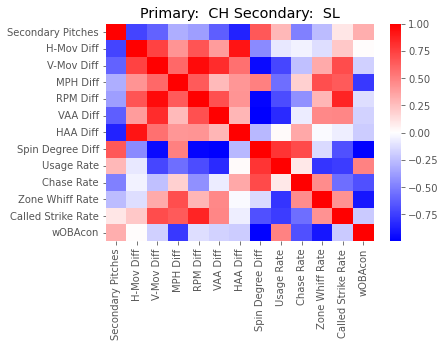

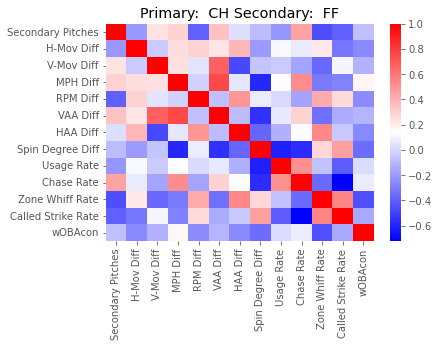

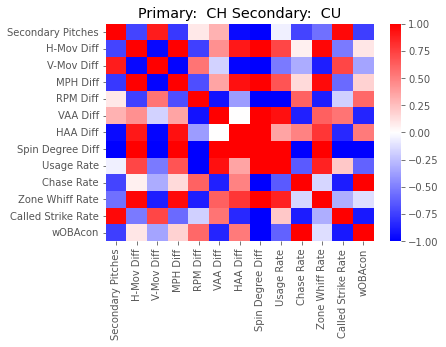

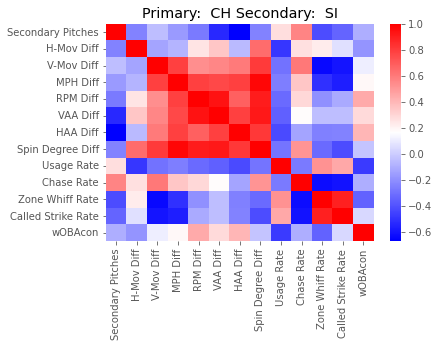

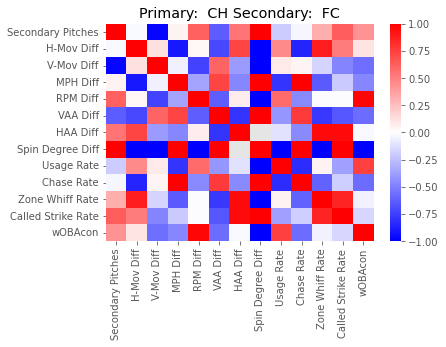

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


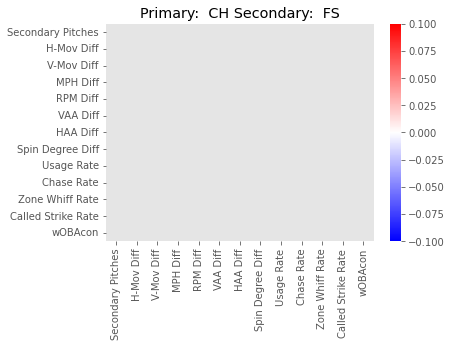

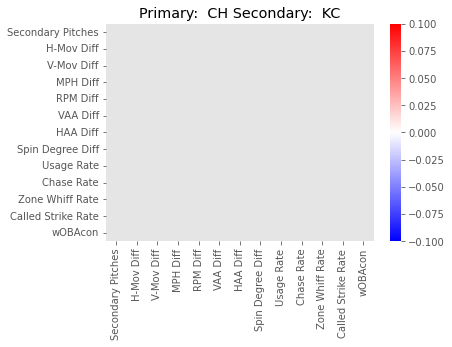

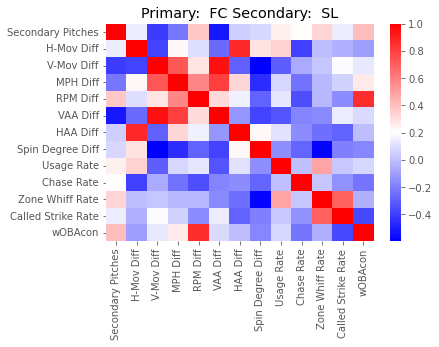

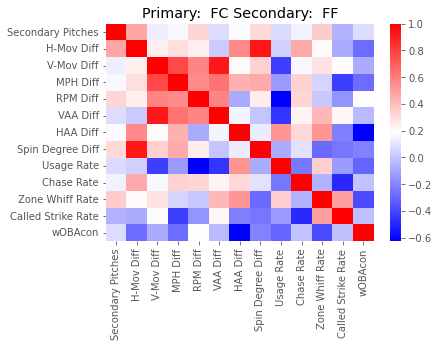

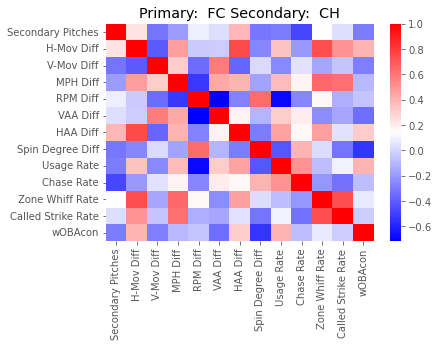

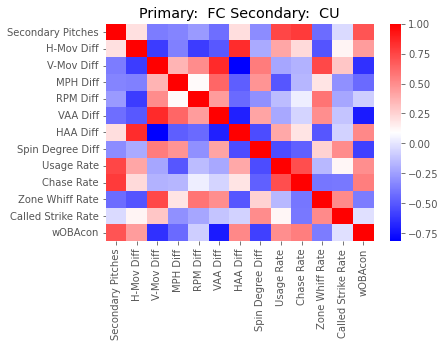

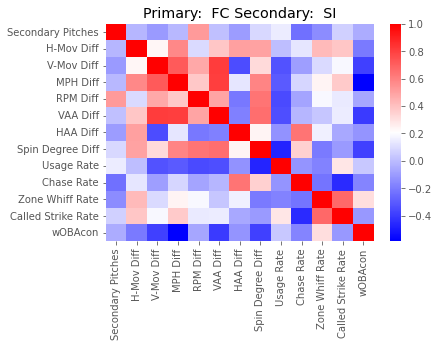

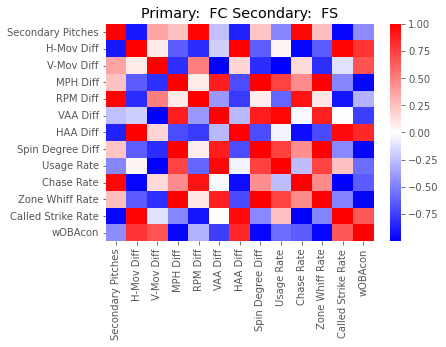

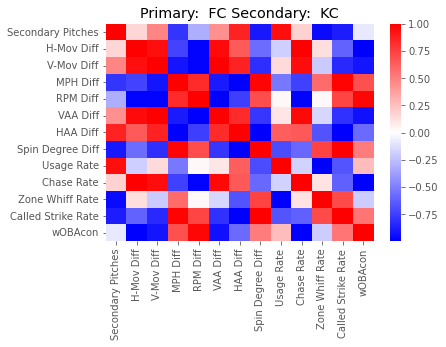

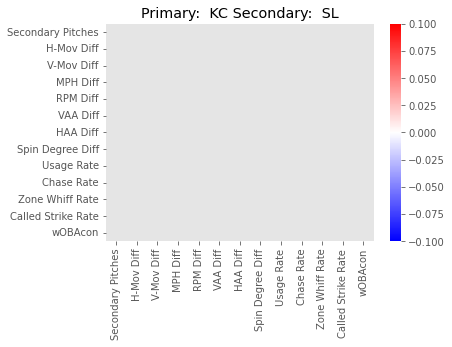

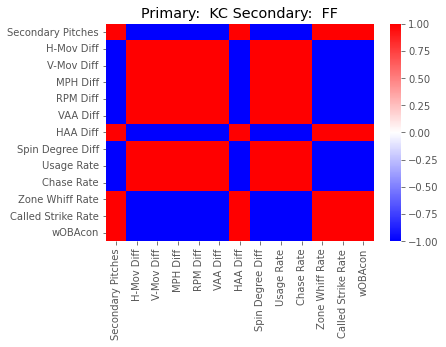

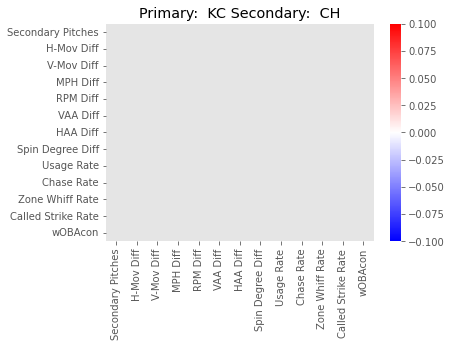

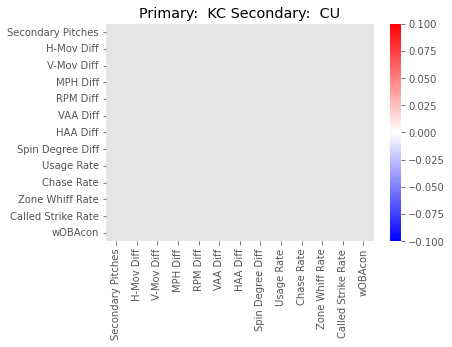

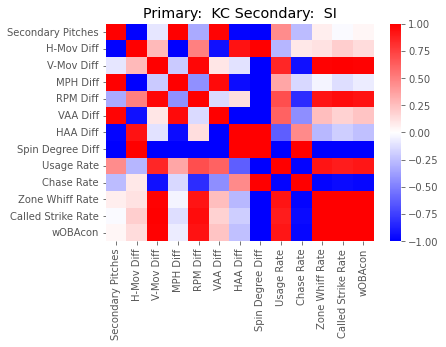

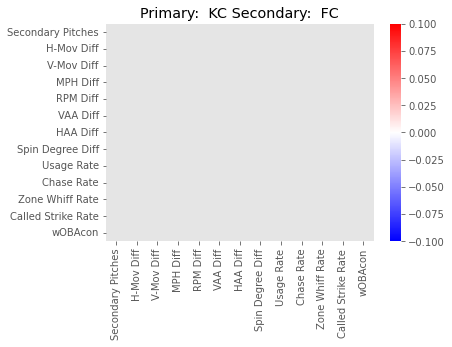

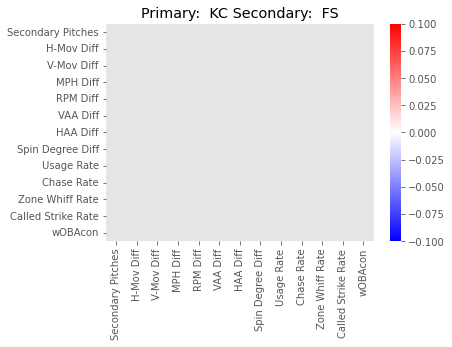

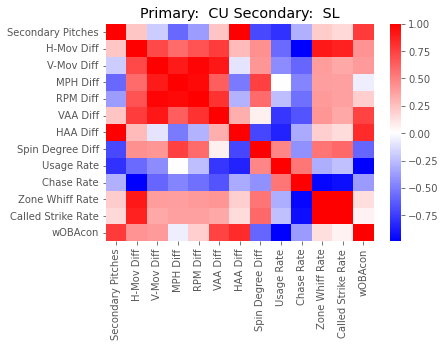

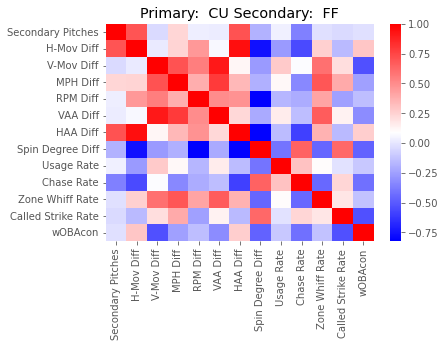

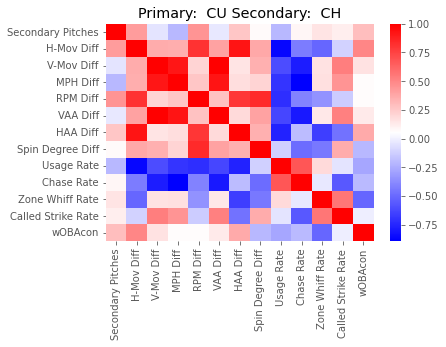

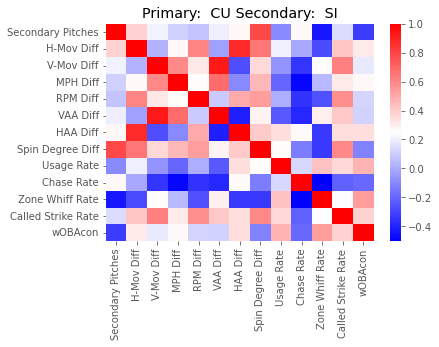

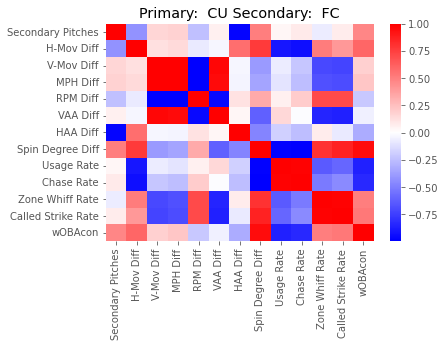

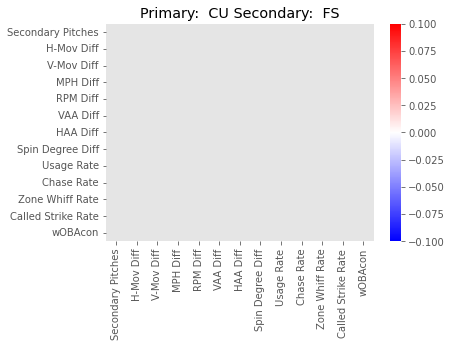

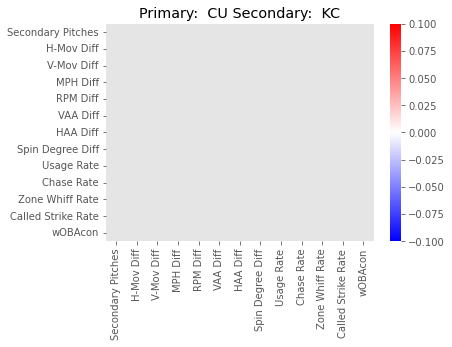

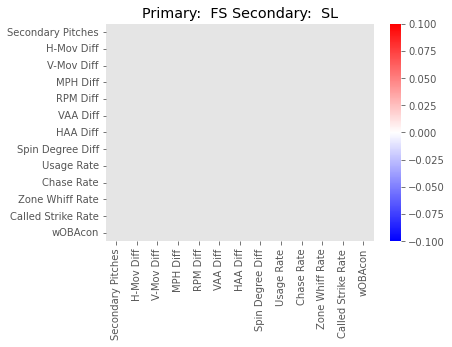

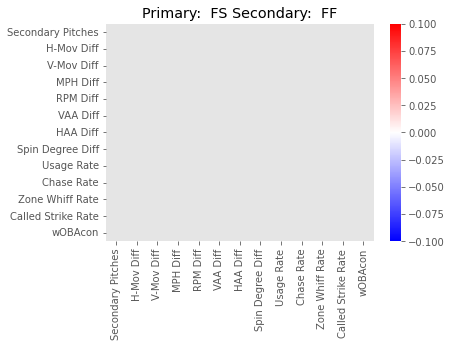

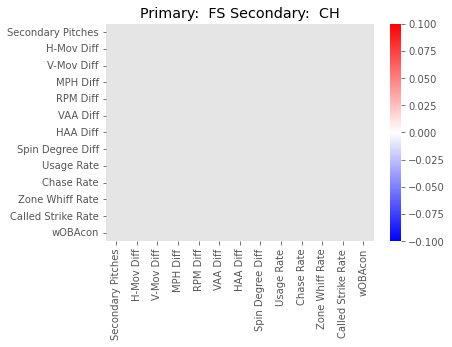

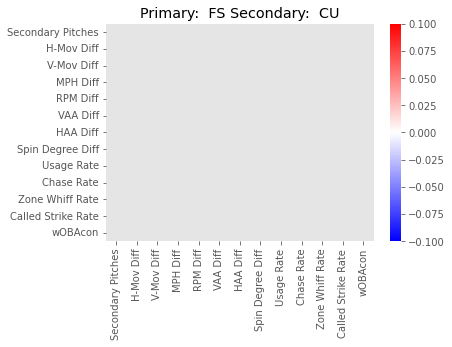

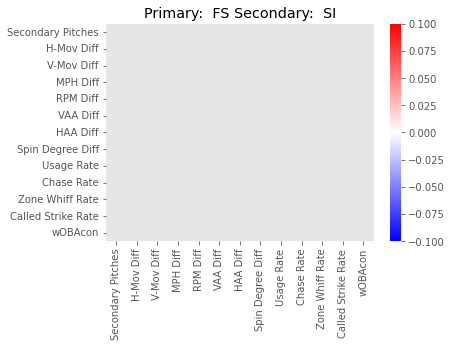

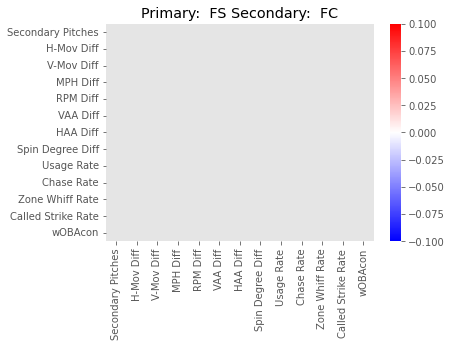

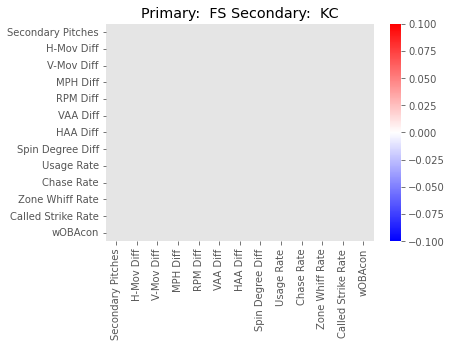

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

for prim in range(len(unique_prim)):
    for prop in range(len(unique_second)):
        first = unique_prim[prim]
        second = unique_second[prop]
        degromers = new_df.query(f'Primary == "{first}" and Secondary == "{second}"')

        #corrmap
        if first != second:
            ax = plt.axes()
            dataplot = sns.heatmap(degromers.corr(), cmap="bwr",ax=ax)
            ax.set_title(f'Primary: {first} Secondary: {second}')
            plt.savefig(f'Corr Plot Primary:{first} Secondary:{second}.png')
        plt.show()

In [197]:
# outlier removing
statsli = ['Chase Rate','Called Strike Rate','Zone Whiff Rate','wOBAcon']
for stat in range(len(statsli)):
    print(statsli[stat])
    stater = statsli[stat]
    q1 = new_df[stater].quantile(.25)
    q3 = new_df[stater].quantile(.75)
    iqr = q3 - q1
    lim_lo = q1 - 1.5 * iqr
    lim_hi = q3 + 1.5 * iqr
    out_lo = (new_df[stater] < lim_lo)
    out_hi = (new_df[stater] > lim_hi)
    new_df[stater] = new_df[stater][~(out_lo | out_hi)]

Chase Rate
Called Strike Rate
Zone Whiff Rate
wOBAcon


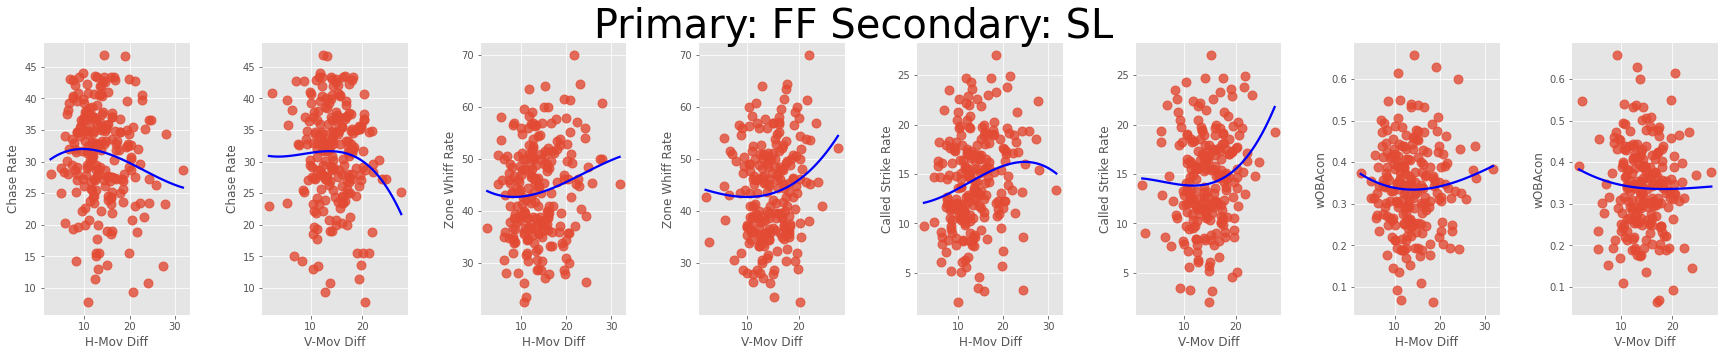

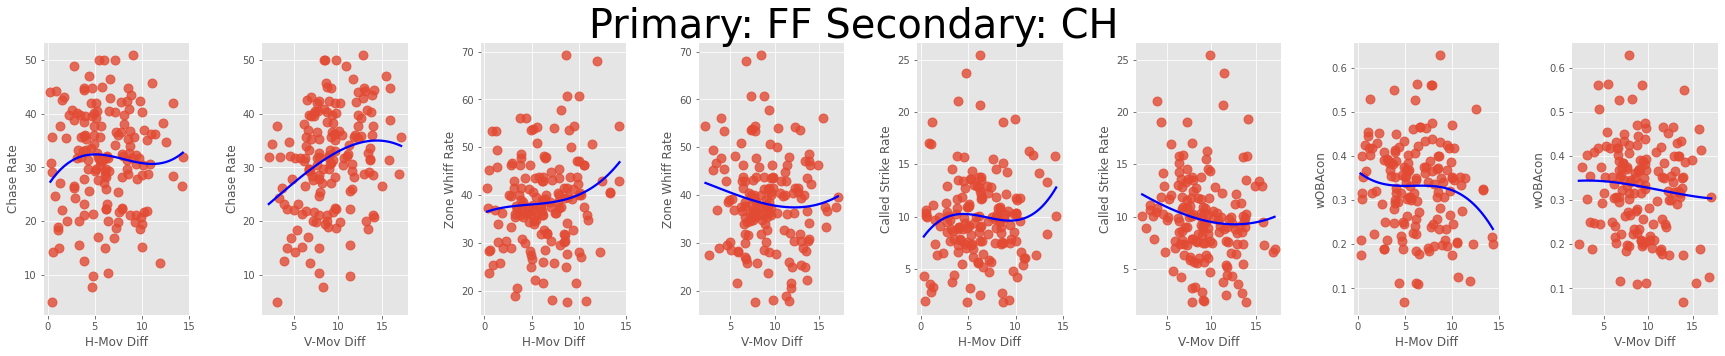

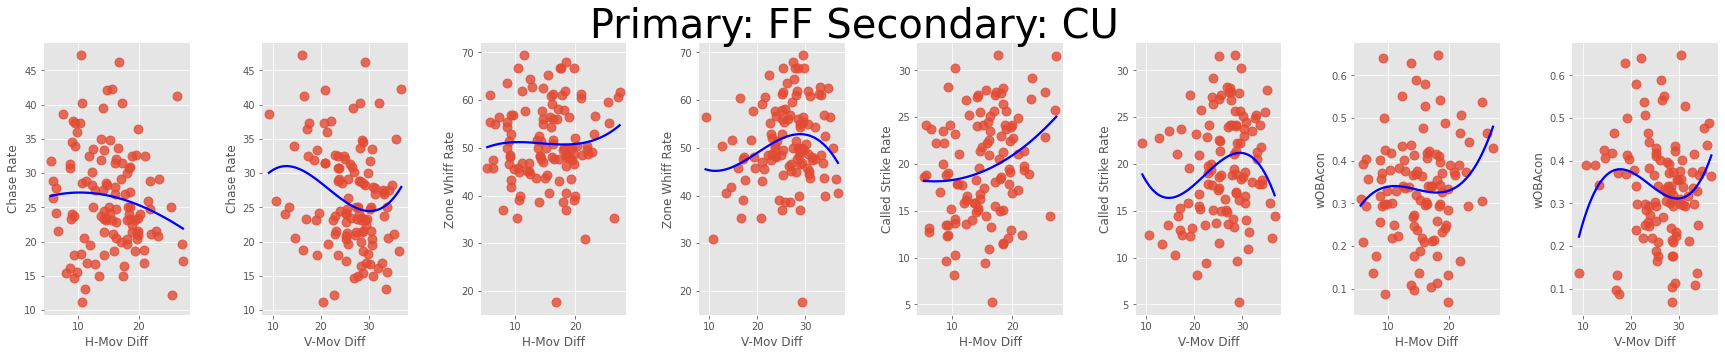

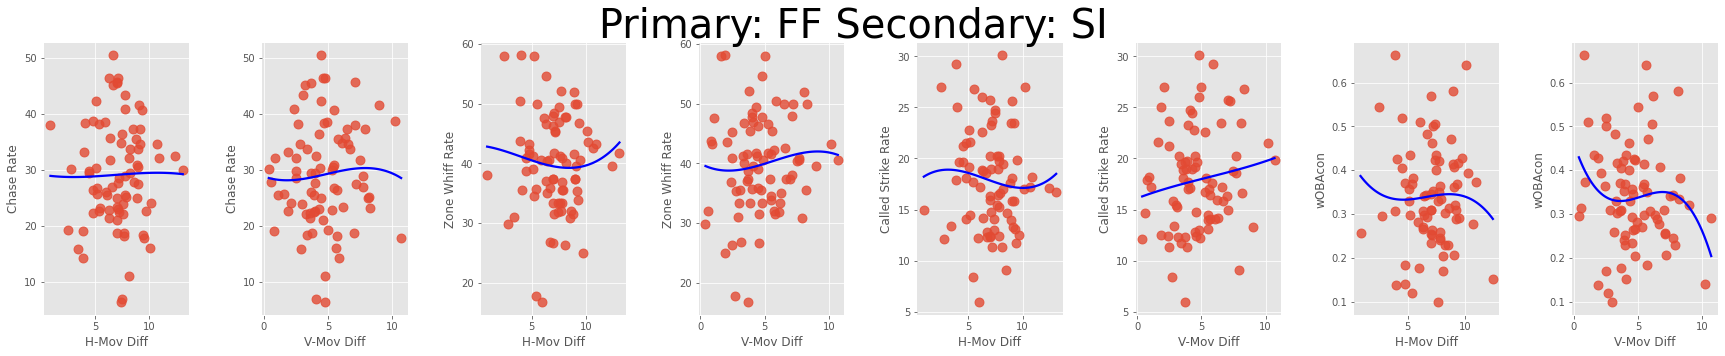

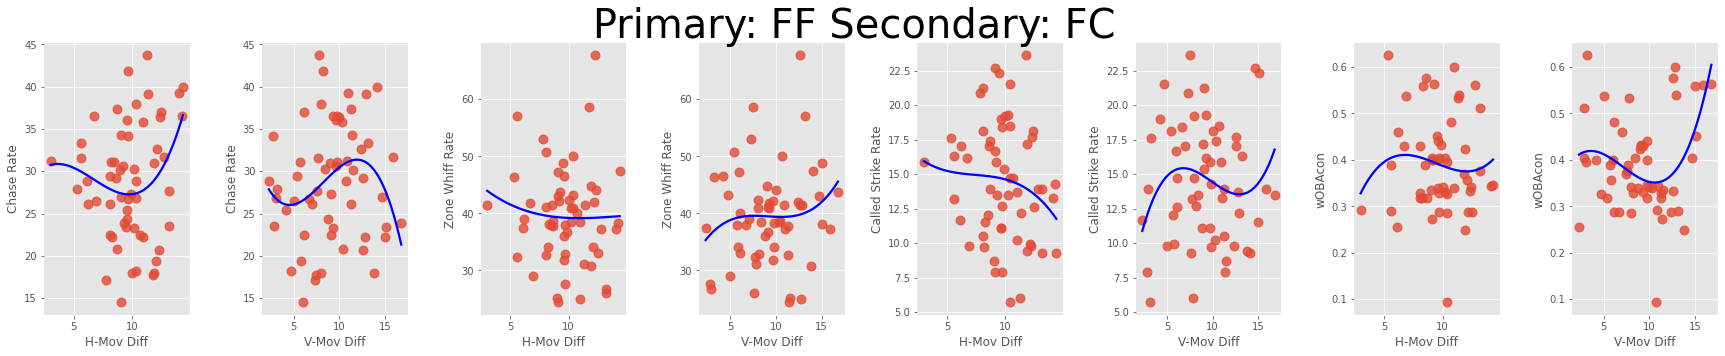

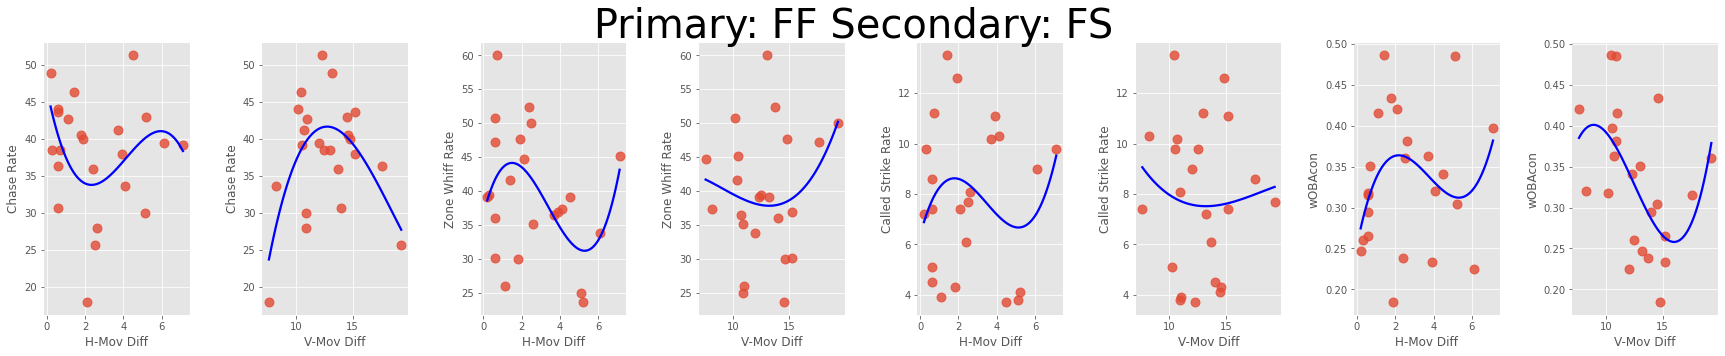

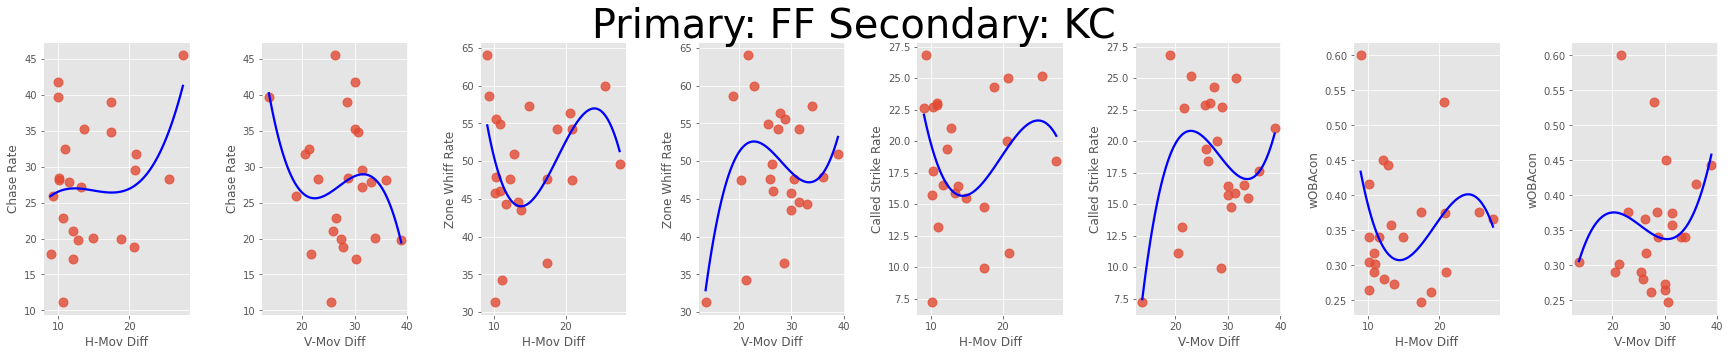

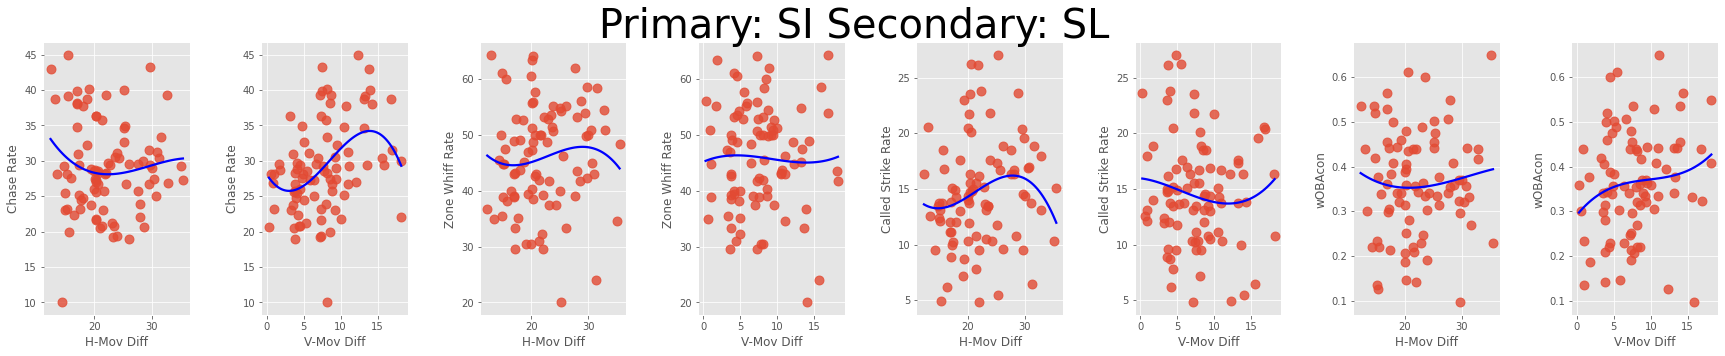

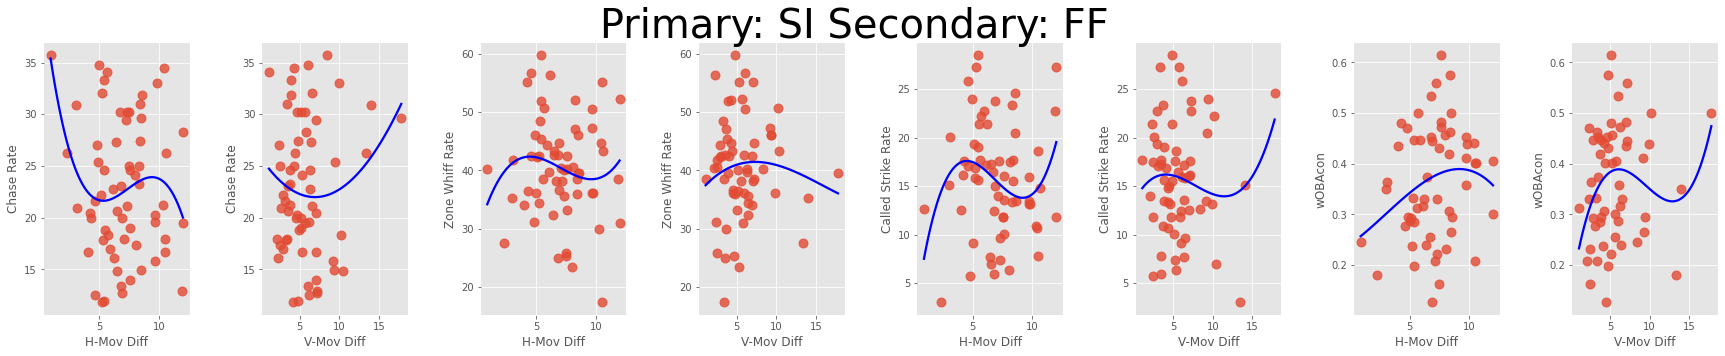

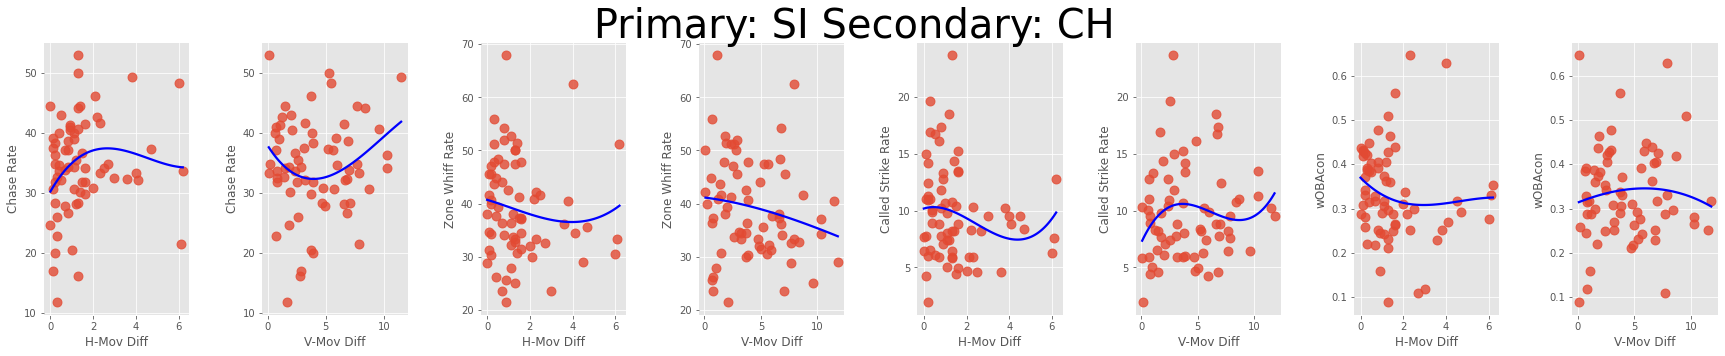

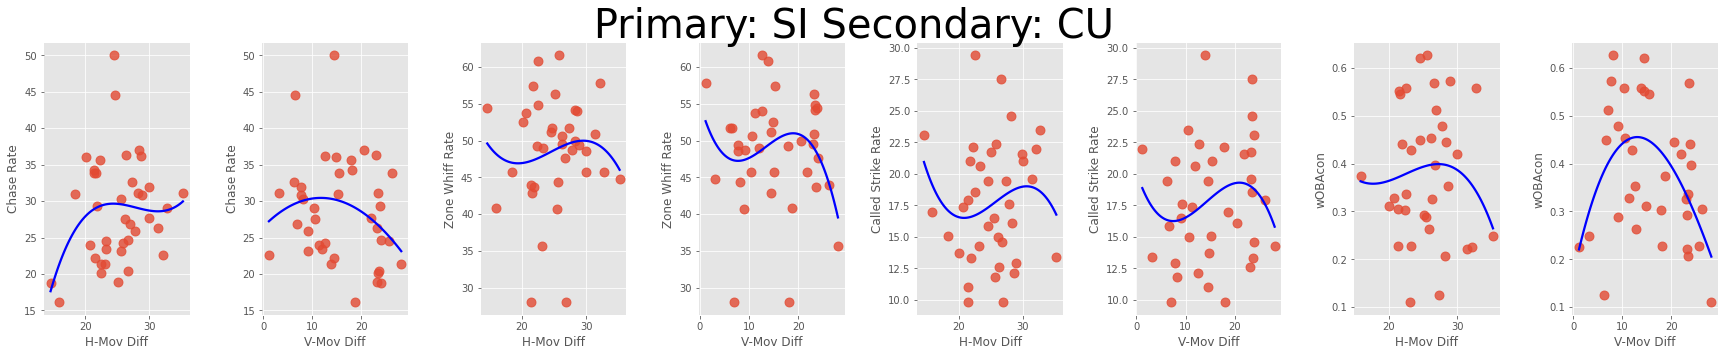

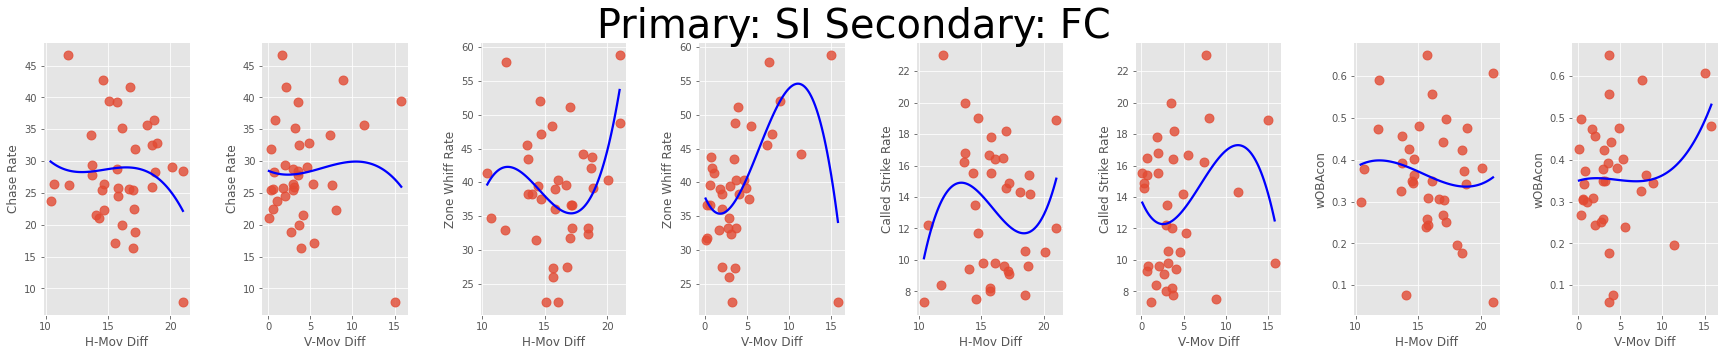

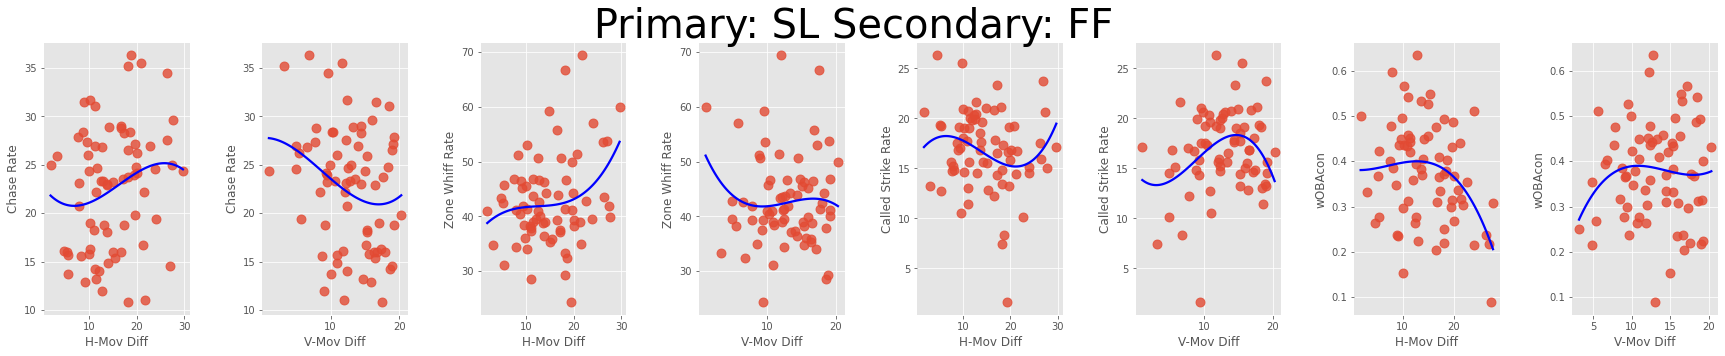

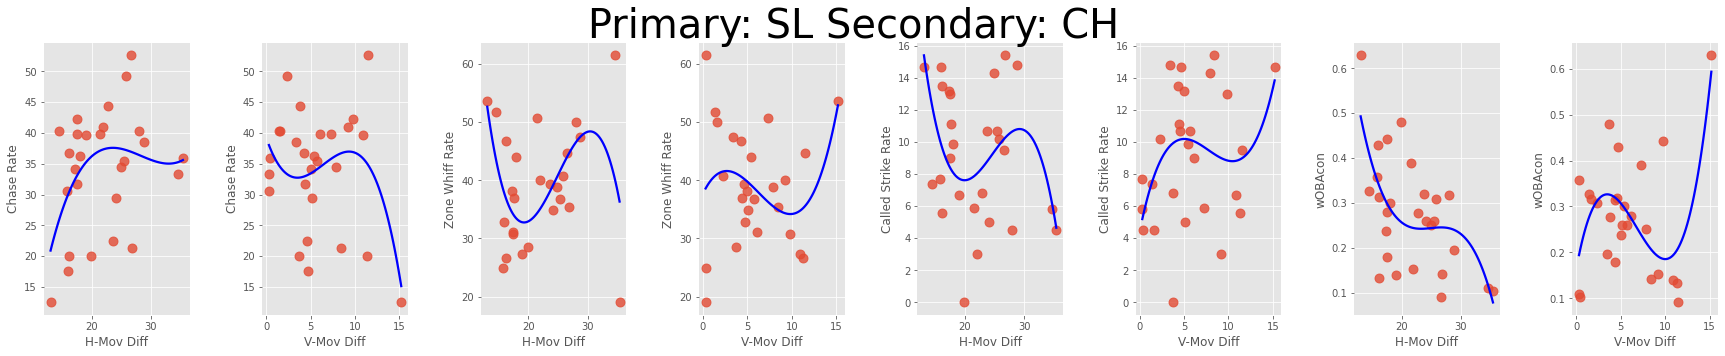

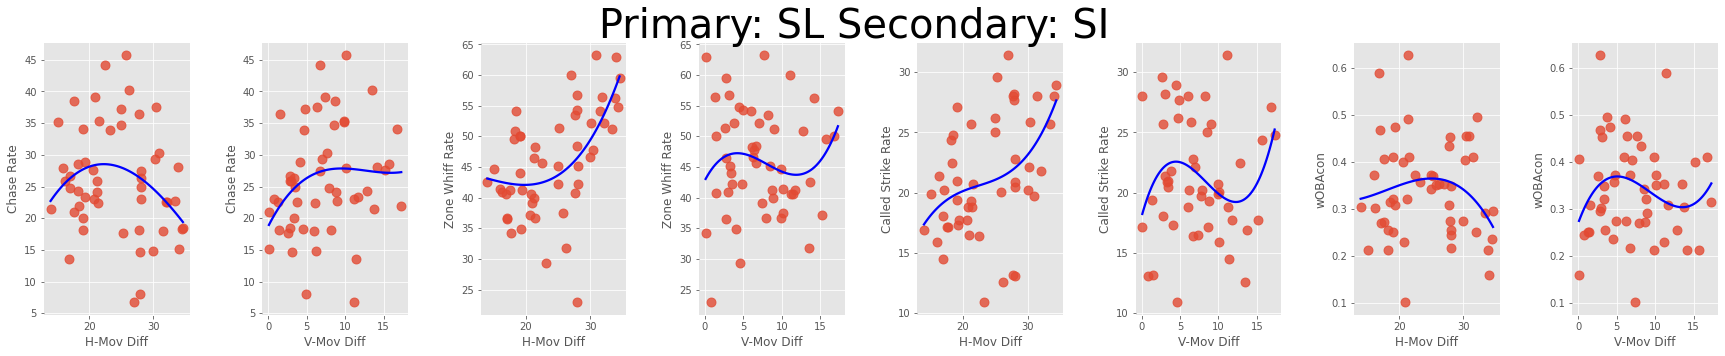

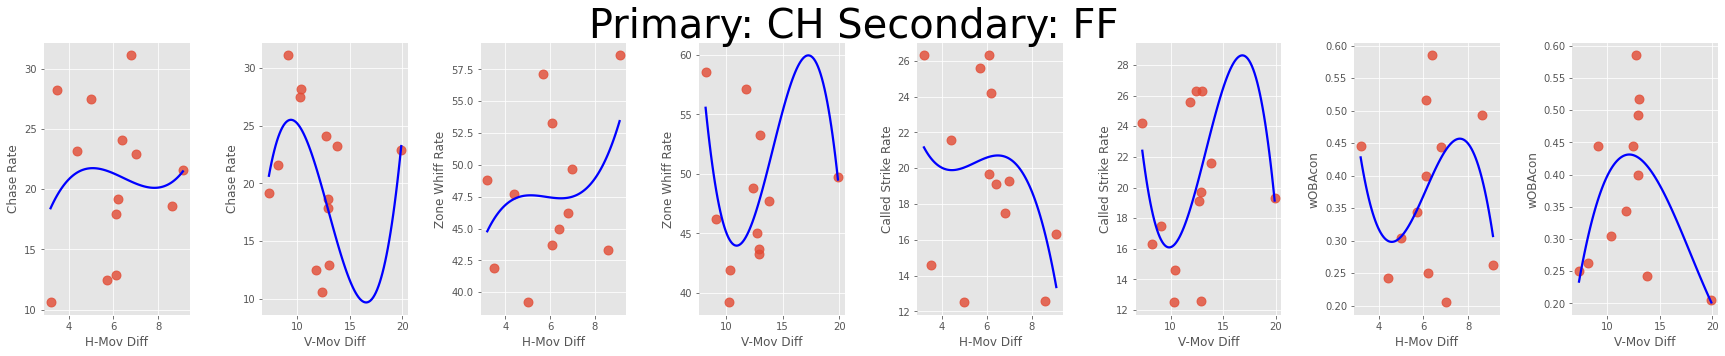

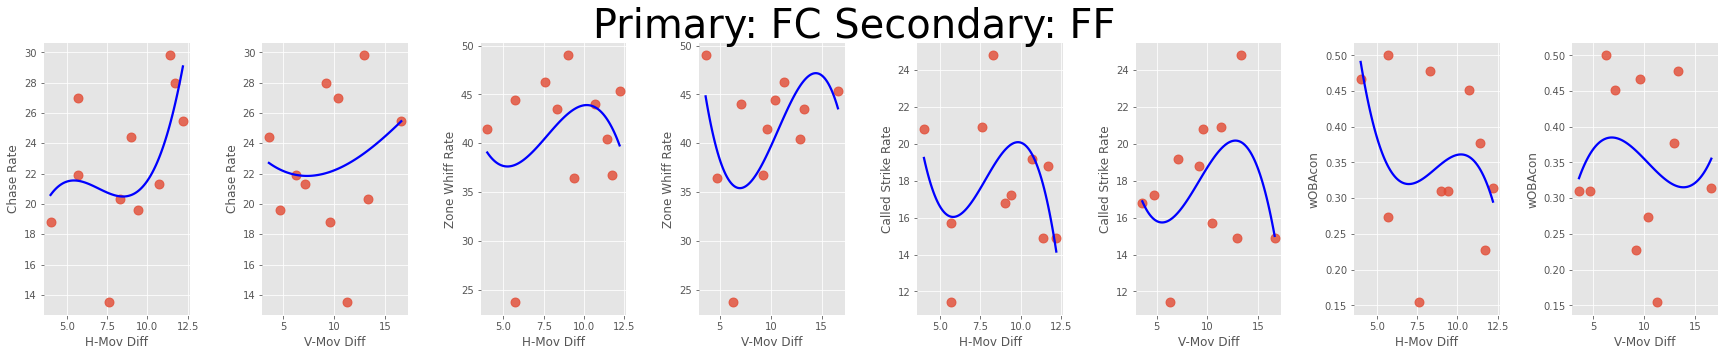

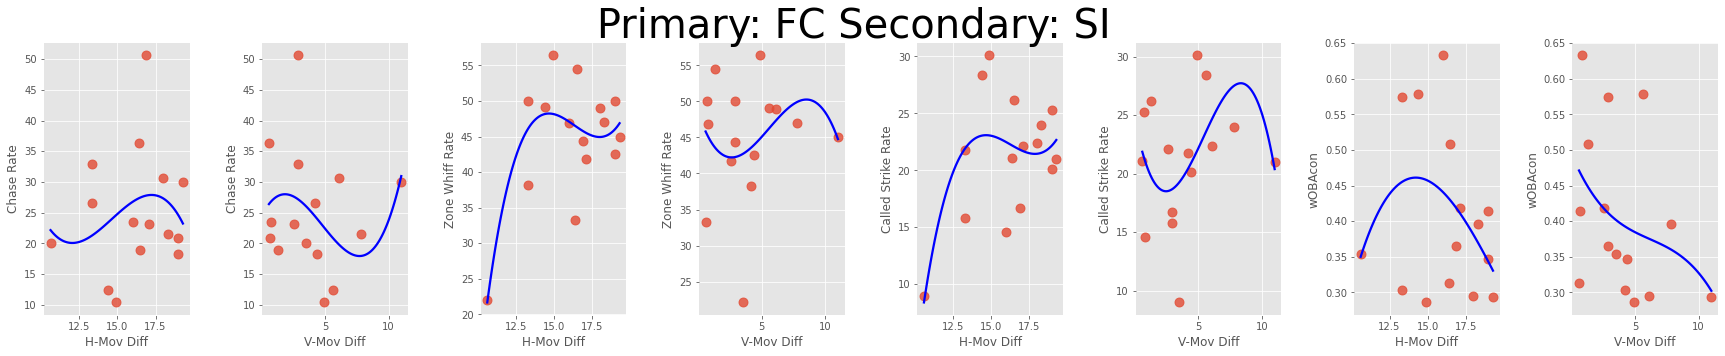

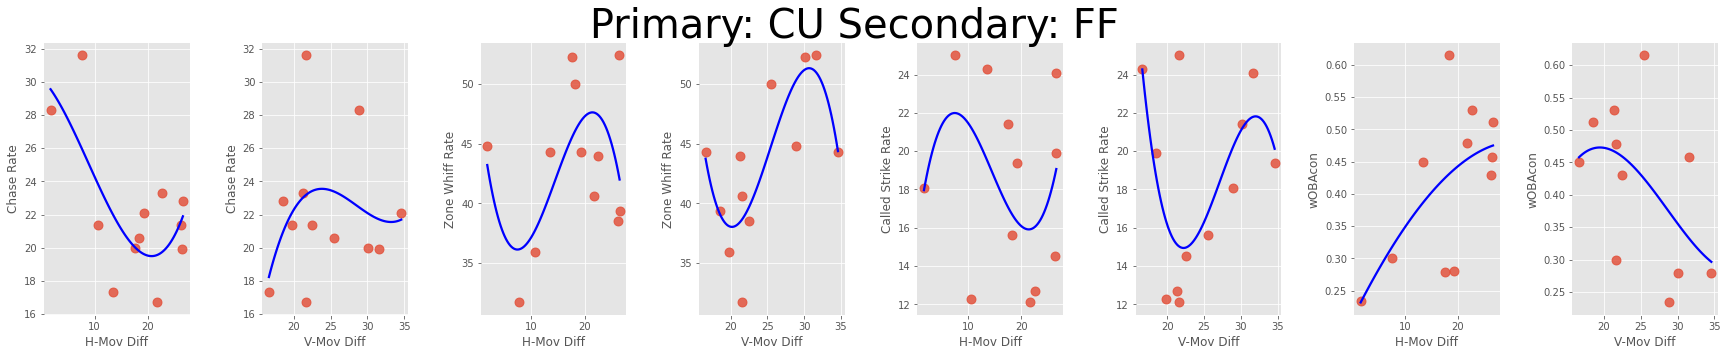

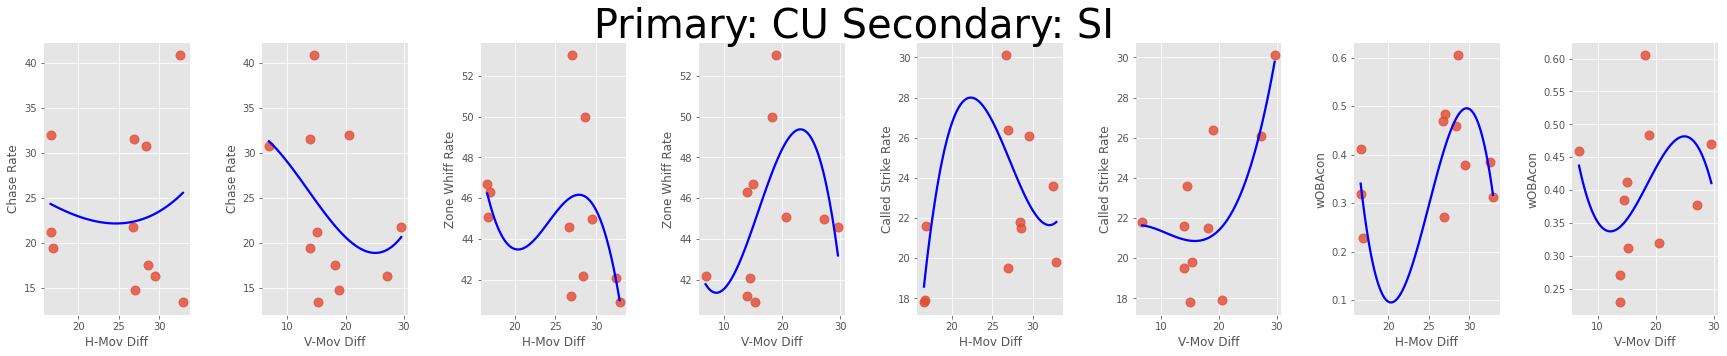

In [198]:
plt.style.use('ggplot')
for prim in range(len(unique_prim)):
    for prop in range(len(unique_second)):
        first = unique_prim[prim]
        second = unique_second[prop]
        degromers = new_df.query(f'Primary == "{first}" and Secondary == "{second}"')

        #corrmap
        if len(degromers) > 10 :

                fig, axs = plt.subplots(ncols=8, figsize=(30,5))
                plt.subplots_adjust(wspace=.5)
                #chase rate plots
                
                sns.regplot(x="H-Mov Diff", y="Chase Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[0], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="Chase Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[1], line_kws={"color": "blue"})
                
                sns.regplot(x="H-Mov Diff", y="Zone Whiff Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[2], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="Zone Whiff Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[3], line_kws={"color": "blue"})

                sns.regplot(x="H-Mov Diff", y="Called Strike Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[4], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="Called Strike Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[5], line_kws={"color": "blue"})

                sns.regplot(x="H-Mov Diff", y="wOBAcon", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[6], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="wOBAcon", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[7], line_kws={"color": "blue"})

                sns.despine(left=True)

                fig.suptitle(f'Primary:{first} Secondary:{second}',size=40)
                fig.savefig(f'Primary:{first} Secondary:{second}.png')
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=5, hspace=None)

In [ ]:
df1 = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/diffboi.csv')
df1.query('Pitcher == "Darvish Yu"')

Unnamed: 0     Pitcher Primary Secondary  H-Mov Diff  V-Mov Diff  \
72         440  Darvish Yu      FC        FF        12.2        16.6   
73         441  Darvish Yu      FC        SL         9.9         2.3   
74         442  Darvish Yu      FC        SI        19.3        11.0   
75         443  Darvish Yu      FC        FS        11.1         4.1   
76         444  Darvish Yu      FC        CU         6.1        15.0   

    MPH Diff  RPM Diff  VAA Diff  HAA Diff  Spin Degree Diff  Usage Rate  \
72       8.6     348.0       2.6       1.4              29.1        23.0   
73       4.0      23.0       0.9       1.1              19.8        18.0   
74       8.2     478.0       2.1       2.1              25.2         9.7   
75       2.9    1419.0       0.3       2.0              11.4         5.7   
76      13.9     122.0       3.3       0.3              35.8         4.4   

    Chase Rate  Zone Whiff Rate  Called Strike Rate  wOBAcon  
72        25.5             45.3                14.9    0.314  
73        36.8             43.2                15.0    0.260  
74        30.0             45.0                21.0    0.293  
75        40.9             29.7                 3.8    0.277  
76        15.6             53.5                20.5    0.220